# Predictive Diagnostics

## Importing Libraries

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Familiarizing With Dataset

In [7]:
heart = pd.read_csv("heart.csv")

In [6]:
heart.head()

,num,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


* num :- Diagnosis of heart disease (0 = no disease, 1-4 = presence of disease). Sometimes binarized as 0 (healthy), 1 (diseased).
* age :- Age of the patient (in years)
* sex :- 1 = Male, 0 = Female
* cp :- Type of chest pain:
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic
* trestbps :- Resting blood pressure (in mm Hg) on admission
* chal :- Serum cholesterol in mg/dl
* restecg :- Resting electrocardiographic results:
0: Normal
1: ST-T wave abnormality
2: Left ventricular hypertrophy
* thalach :- Maximum heart rate achieved during test
* exang :- Exercise-induced angina:
1 = Yes, 0 = No
* oldpeak :- ST depression induced by exercise relative to rest
* slope :- Slope of the peak exercise ST segment:
0: Upsloping
1: Flat
2: Downsloping
* ca :- Number of major vessels (0–3) colored by fluoroscopy
* thal :- 3 = Normal
6 = Fixed defect
7 = Reversible defect

### Significance of Variables in UCI Heart Disease Dataset

The following explains how each feature in the dataset contributes to predicting the presence of heart disease:

#### 1. Age
- **Significance**: As age increases, the likelihood of heart-related issues also rises due to weakened cardiac function and buildup of arterial plaque over time.

#### 2. Chest Pain Type (`cp`)
- **Significance**: Indicates the nature of chest pain experienced.
- **Interpretation**:
  - Typical angina and atypical angina are strongly associated with coronary artery disease.
  - The more severe the chest pain, the higher the probability of heart disease.

#### 3. Resting Blood Pressure (`trestbps`)
- **Significance**: Shows the pressure in the arteries while at rest.
- **Interpretation**: Elevated resting blood pressure indicates hypertension, a major risk factor for heart failure and artery damage.

#### 4. Serum Cholesterol (`chol`)
- **Significance**: Measures cholesterol levels in mg/dl.
- **Interpretation**: High cholesterol can result in atherosclerosis (plaque buildup), which increases the risk of heart attacks.

#### 5. Fasting Blood Sugar (`fbs`)
- **Significance**: Checks if fasting blood sugar is >120 mg/dl.
- **Interpretation**: High levels suggest diabetes or insulin resistance, which significantly raise the risk of cardiovascular diseases.

#### 6. Resting ECG Results (`restecg`)
- **Significance**: Measures electrical activity of the heart at rest.
- **Interpretation**: Abnormalities can suggest heart enlargement, arrhythmias, or past myocardial infarctions.

#### 7. Maximum Heart Rate Achieved (`thalach`)
- **Significance**: Indicates heart response to exercise.
- **Interpretation**: A lower-than-expected value may suggest blocked arteries or reduced cardiac output under stress.

#### 8. Exercise-Induced Angina (`exang`)
- **Significance**: Detects chest pain triggered by exercise.
- **Interpretation**: A "Yes" often signals ischemia due to narrowed coronary arteries.

#### 9. ST Depression (`oldpeak`)
- **Significance**: Measures ST segment depression during stress.
- **Interpretation**: Greater depression can indicate myocardial ischemia or reduced blood flow to the heart during exercise.

#### 10. Slope of ST Segment (`slope`)
- **Significance**: Reflects the direction of the ST segment slope after exercise.
- **Interpretation**:
  - Downsloping: Strong indicator of heart disease.
  - Flat: Potential concern.
  - Upsloping: More likely to be normal.

#### 11. Number of Major Vessels Colored (`ca`)
- **Significance**: Number of major arteries shown to be blocked by fluoroscopy.
- **Interpretation**: A higher value directly correlates with increased heart disease severity.

#### 12. Thalassemia (`thal`)
- **Significance**: Refers to a type of inherited blood disorder affecting hemoglobin.
- **Interpretation**:
  - Fixed defect or reversible defect can impair oxygen transport, which stresses the heart and increases disease risk.


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num       303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    float64
 13  thal      303 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


there are no Null values or any mistaken datatypes

In [8]:
heart.drop_duplicates(inplace=True)

In [9]:
 heart.describe()

,num,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.937294,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,1.228536,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,2.000000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,4.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


By examining the standard deviation (std) of each feature, we observed that none of them has a standard deviation of exactly 1. This indicates that the features do not share a uniform scale and instead exhibit varying levels of spread in their values. The presence of diverse value distributions across features suggests that each contributes unique and potentially significant information to the prediction of heart disease.

In [10]:
correlated = heart.corr()

<Axes: >

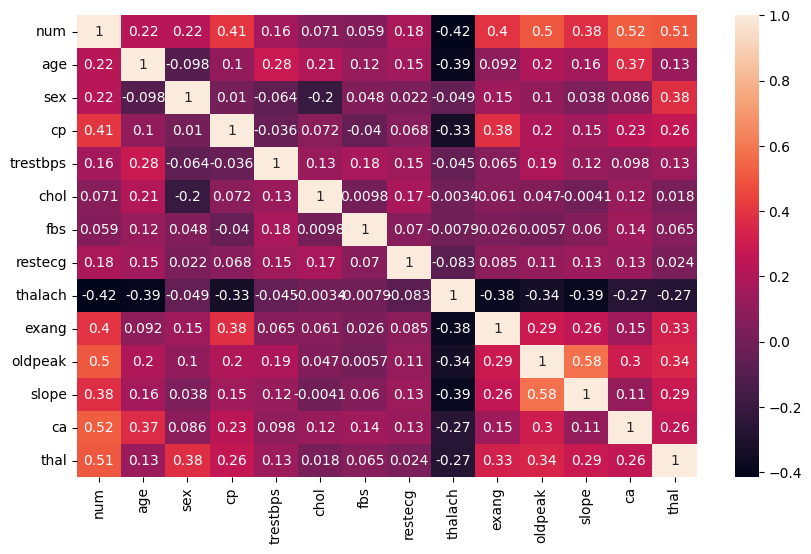

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data = correlated,annot = True)

In [12]:
num_corr = correlated["num"]

In [13]:
num_corr.sort_values(ascending=False)

num         1.000000
ca          0.520968
thal        0.507155
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64

Based on our analysis, we found that the likelihood of an individual experiencing a heart attack is strongly influenced by certain key features — particularly ca (number of major vessels colored by fluoroscopy), followed by thal (thalassemia condition), and oldpeak (ST depression induced by exercise relative to rest). Among these, the ca feature demonstrated the strongest correlation, indicating its significant impact on predicting heart disease.

## Model Selection

In [8]:
heart["num"].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [9]:
y = heart["num"]
x = heart[["ca","thal","oldpeak"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .2,random_state = 42)

####  Logistic Regression

In [142]:
lr = LogisticRegression(max_iter = 100,random_state = 42,class_weight = 'balanced')
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
# accuracy score on the training data
lr_train_pred = lr.predict(x_train)
lr_train_acc = accuracy_score(y_train,lr_train_pred) *100
print(f"Model achieved a {lr_train_acc:.2f} training accuracy")

Model achieved a 55.37 training accuracy


In [60]:
# accuracy score on the training data
lr_test_pred = lr.predict(x_test)
lr_test_acc = accuracy_score(y_test,lr_test_pred) *100
print(f"Model achieved a {lr_test_acc:.2f} testing accuracy")

Model achieved a 50.82 testing accuracy


From the label distribution in the num column, it is evident that the dataset is imbalanced, with a majority of the instances belonging to class 0. To address this imbalance, we will be using the class_weight='balanced' parameter in our model. This approach automatically adjusts the weights inversely proportional to class frequencies, ensuring that the minority classes are given more importance during training.

Alternatively, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be used to generate synthetic samples for the minority classes. However, due to the significant imbalance and the limited number of original data points, synthetic oversampling may lead to overfitting or introduce noise. Hence, in this case, we opt for the balanced class weights instead of adding synthetic data.

#### K-Nearest Neighbors

In [27]:
accuracy_scores = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

best_k = accuracy_scores.index(max(accuracy_scores)) + 1

In [28]:
accuracy =  pd.DataFrame({
    "K":[i+1 for i in range (0,len(accuracy_scores))],
    "Accuracy":accuracy_scores
})

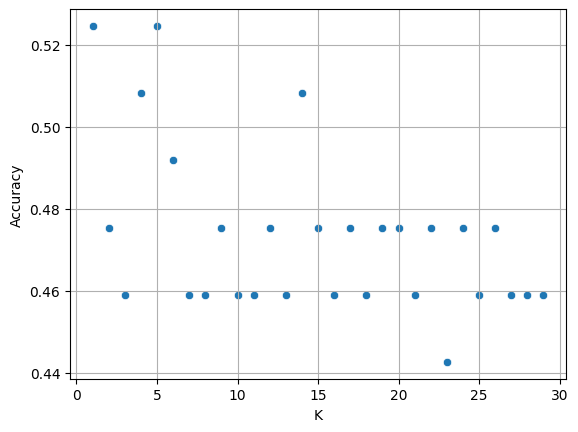

In [14]:
sns.scatterplot(x = "K",y = "Accuracy",data = accuracy)
plt.grid(True)

In [26]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
best_k

24

In [143]:
knn = KNeighborsClassifier(n_neighbors=24,algorithm="auto")
knn.fit(x_train,y_train)

,n_neighbors,24
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
# accuracy score on the training data
knn_train_pred = knn.predict(x_train)
knn_train_acc = accuracy_score(y_train,knn_train_pred) *100
print(f"Model achieved a {knn_train_acc:.2f} training accuracy")

Model achieved a 61.57 training accuracy


In [47]:
# accuracy score on the training data
knn_test_pred = knn.predict(x_test)
knn_test_acc = accuracy_score(y_test,knn_test_pred) *100
print(f"Model achieved a {knn_test_acc:.2f} testing accuracy")

Model achieved a 57.38 testing accuracy


#### Random Forest

In [15]:
accuracy_scores = []

for k in range(1, 101):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

best_k = accuracy_scores.index(max(accuracy_scores)) + 1

In [16]:
accuracy =  pd.DataFrame({
    "K":[i+1 for i in range (0,len(accuracy_scores))],
    "Accuracy":accuracy_scores
})

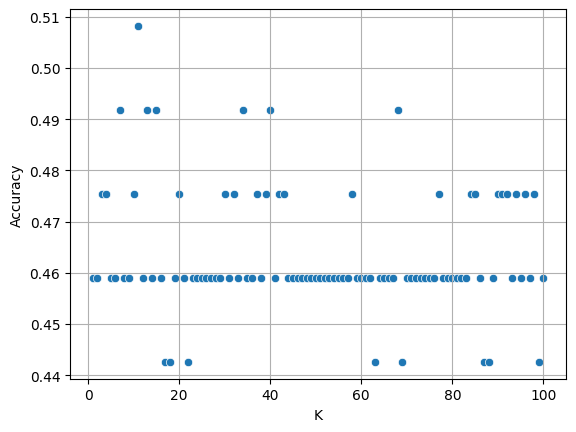

In [17]:
sns.scatterplot(x = "K",y = "Accuracy",data = accuracy)
plt.grid(True)

In [18]:
best_k

11

In [144]:
rf = RandomForestClassifier(n_estimators=11,random_state=42,max_depth = 5,class_weight='balanced',min_samples_split = 5)

In [76]:
rf.fit(x_train,y_train)

,n_estimators,11
,criterion,'gini'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
# accuracy score on the training data
rf_train_pred = rf.predict(x_train)
rf_train_acc = accuracy_score(y_train,rf_train_pred) *100
print(f"Model achieved a {rf_train_acc:.2f} training accuracy")

Model achieved a 70.25 training accuracy


In [78]:
# accuracy score on the training data
rf_test_pred = rf.predict(x_test)
rf_test_acc = accuracy_score(y_test,rf_test_pred) *100
print(f"Model achieved a {rf_test_acc:.2f} testing accuracy")

Model achieved a 50.82 testing accuracy


#### XGBoosting

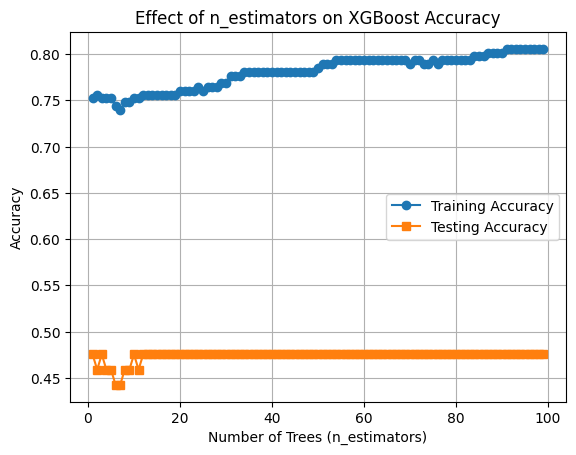

In [135]:
train_scores = []
test_scores = []
estimators = list(range(1,100))  # Try 50, 100, ..., 500

for n in range(1,100):
    model = XGBClassifier(
        objective='multi:softmax',
        num_class=len(y.unique()),
        n_estimators=n,
        random_state=42,
        learning_rate = .05
    )
    
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = accuracy_score(y_test, model.predict(x_test))
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    # print(f"n_estimators = {n} -> Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# 📊 Plot the results
plt.plot(estimators, train_scores, marker='o', label='Training Accuracy')
plt.plot(estimators, test_scores, marker='s', label='Testing Accuracy')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on XGBoost Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [136]:
xgb = XGBClassifier(objective='multi:softmax',num_class=len(y.unique()),n_estimators=20,random_state=42,learning_rate=.05)

In [137]:
xgb.fit(x_train,y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [138]:
# accuracy score on the training data
xgb_train_pred = xgb.predict(x_train)
xgb_train_acc = accuracy_score(y_train,xgb_train_pred) *100
print(f"Model achieved a {xgb_train_acc:.2f} training accuracy")

Model achieved a 76.03 training accuracy


In [139]:
# accuracy score on the training data
xgb_test_pred = rf.predict(x_test)
xgb_test_acc = accuracy_score(y_test,xgb_test_pred) *100
print(f"Model achieved a {xgb_test_acc:.2f} testing accuracy")

Model achieved a 50.82 testing accuracy


## Prediction

In [152]:
ca = int(input("Enter the number of major vessels (0 to 3) visible by fluoroscopy: "))
print("Thalassemia test result options:")
print("1 = Normal")
print("2 = Fixed defect")
print("3 = Reversible defect")
thal = int(input("Enter your thalassemia test result (1 for Normal, 2 for Fixed defect, 3 for Reversible defect): "))
oldpeak = float(input("Enter the ST depression induced by exercise relative to rest (oldpeak): "))
user_input = [ca, thal, oldpeak]


model_switch = {
    "logistic": lr,
    "knn": knn,
    "random_forest": rf,
    "xgboost": xgb
}
print("Choose a model for prediction:")
print("Options: logistic, knn, random_forest, xgboost")
model_choice = input("Enter model name: ").strip().lower()

user_df = pd.DataFrame([user_input], columns=['ca', 'thal', 'oldpeak'])
scaled = scaler.transform(user_df)
if model_choice in model_switch:
    selected_model = model_switch[model_choice]
    print(f"✅ {model_choice.title()} model selected.")
else:
    print("❌ Invalid model name.\n choosing the high accuracy model")
    selected_model = xgb
    

pred = selected_model.predict(user_df)
risk_mapping = {
    0: "No heart disease",
    1: "Low risk of heart disease",
    2: "Medium risk of heart disease",
    3: "High risk of heart disease",
    4: "Very high risk of heart disease"
}
risk_level = risk_mapping.get(pred[0], "Unknown prediction")
print(f"🔍 Prediction: {pred[0]} → {risk_level}")


Enter the number of major vessels (0 to 3) visible by fluoroscopy:  1


Thalassemia test result options:
1 = Normal
2 = Fixed defect
3 = Reversible defect


Enter your thalassemia test result (1 for Normal, 2 for Fixed defect, 3 for Reversible defect):  1
Enter the ST depression induced by exercise relative to rest (oldpeak):  1


Choose a model for prediction:
Options: logistic, knn, random_forest, xgboost


Enter model name:  x


❌ Invalid model name.
 choosing the high accuracy model
🔍 Prediction: 1 → Low risk of heart disease


## Conclusion

In this project, we developed a predictive model to assess the risk of heart disease using key clinical features such as ca (number of major vessels visible by fluoroscopy), thal (thalassemia test result), and oldpeak (ST depression induced by exercise). By analyzing the dataset and comparing several supervised learning algorithms — including Logistic Regression, K-Nearest Neighbors, Random Forest, and XGBoost — we identified that XGBoost provided the most reliable performance, especially after addressing class imbalance and overfitting through regularization and model tuning.

We also implemented a dynamic model selection interface using Python’s dictionary-based switch logic, allowing real-time selection between trained models. Furthermore, a user-friendly input and prediction system was created, converting raw numeric predictions into clear, human-readable diagnostic labels. This enhances interpretability, making the model suitable for real-world clinical decision support.

Overall, this project demonstrates the potential of machine learning models to assist in early heart disease detection and personalized medical decision-making when carefully trained, evaluated, and deployed with thoughtful feature engineering and user interaction in mind.